# corpus

# idea : vetnam corpus need!!

In [1]:
%%time
import nltk
nltk.download("book")
nltk.download("movie_reviews")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_tree

CPU times: user 3.74 s, sys: 1.7 s, total: 5.44 s
Wall time: 1min 37s


[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection book
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
emma_raw= nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:702])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


# Tokenizing
### 실제단어와 무관해도됨
### 숫자여도됨



#### Normalization morpheme

# 의미와 쓰임이 같은 단어를 같은 토큰으로 표시 
# 대소문자 통합()
# 어간 추출 stemming 
## - stem + affix
## - simple algorithm use : PorterStemmer, LancasterStemmer
# 표제어 추출 Lemmatization 
# 품사 추출 
# 불용어 stop-words 너무 자주쓰이거나 너무 드문단어, 분석불필요어


In [8]:
# step 1
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [10]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

In [15]:
# step 2 
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying','flew', 'flown']

print("PorterStemmer    : ", [st1.stem(w) for w in words])
print("LancasterStemmer : ", [st2.stem(w) for w in words])

PorterStemmer    :  ['fli', 'fli', 'fli', 'flew', 'flown']
LancasterStemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


In [17]:
# step 3
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos='v') for w in words] # pos = verb

['fly', 'fly', 'fly', 'fly', 'fly']

In [20]:
from nltk.tag import pos_tag # 품사 부착

sentence = "Emmma refuesed permmit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list
# 튜플리스크로 반환

[('Emmma', 'NNP'),
 ('refuesed', 'VBD'),
 ('permmit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [21]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emmma/NNP',
 'refuesed/VBD',
 'permmit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [22]:
from nltk.corpus import stopwords

stopwords.words("english")[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [26]:
from nltk import Text

text = Text(word_tokenize(emma_raw))

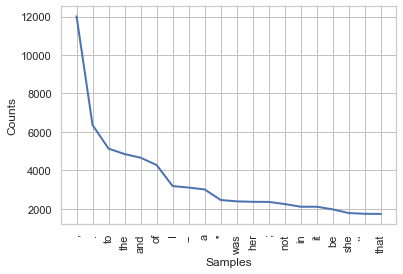

In [30]:
text.plot(20)# words frequency
plt.show()
%matplotlib inline


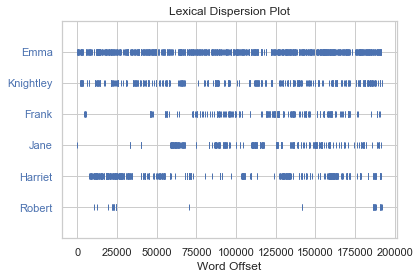

In [31]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])
# 단어가 시간순으로 언급됨을 보여줌 

In [32]:
text.concordance("Jane")

Displaying 25 of 301 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPTER I Emm
ghtleys together , as she does about Jane Fairfax . One is sick of the very na
ax . One is sick of the very name of Jane Fairfax . Every letter from her is r
of nothing else for a month . I wish Jane Fairfax very well ; but she tires me
 than Isabella 's kind inquiry after Jane Fairfax ; and Jane Fairfax , though 
ind inquiry after Jane Fairfax ; and Jane Fairfax , though no great favourite 
n praising . `` That sweet , amiable Jane Fairfax ! '' said Mrs. John Knightle
am most happy to hear it -- but only Jane Fairfax one knows to be so very acco
 now quite safe from any letter from Jane Fairfax . The house belonged to peop
 . She had not been prepared to have Jane Fairfax succeed Mr. Elton ; but he w
o sit some time with us , talking of Jane ; for as soon as she came in , she b
in , she began inquiring after her , Jane is so very great a favourite there .
indness enough ; and I must say that Jane deserve

In [34]:
# step 5
text.similar("Emma", 1)

she


In [38]:
# step 6
text.common_contexts(["Emma", "she"], 1)

said_i


# FreqDist¶

In [39]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [41]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [43]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(word_tokenize(emma_raw))
name_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [45]:
from nltk import FreqDist

stopword = ['Mr.', 'Mrs']
emma_tokens = pos_tag(word_tokenize(emma_raw))
# condition_if_true if condition else condition_if_false
name_list = [t[0] for t in emma_tokens if t[1]=="NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [47]:
from nltk import FreqDist

stop_words = ['MR', 'Mrs']
emma_tokens = pos_tag(word_tokenize(emma_raw))
name_list = [ t[0] for t in emma_tokens if t[1]=="NNP" and t[0] not in stopwords]
fd_names = FreqDist(name_list)

In [48]:
# step 3 빈도분석
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')

(6924, 829, 0.11972848064702483)

In [50]:
fd_names.most_common(5) # 상품에 대한 감정분석 "형용사"를 뽑을때 

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

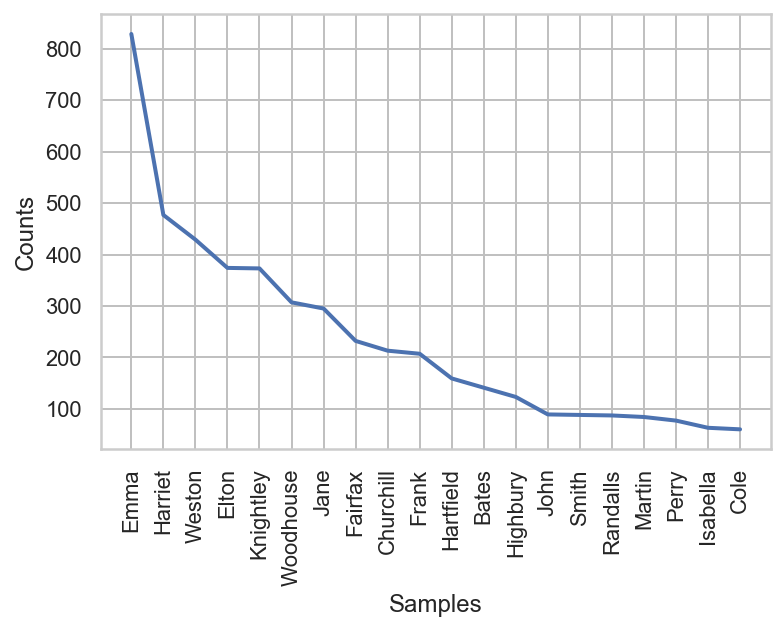

In [52]:

%config InlineBackend.figure_format = 'retina'
fd_names.plot(20)

TypeError: 'str' object is not callable

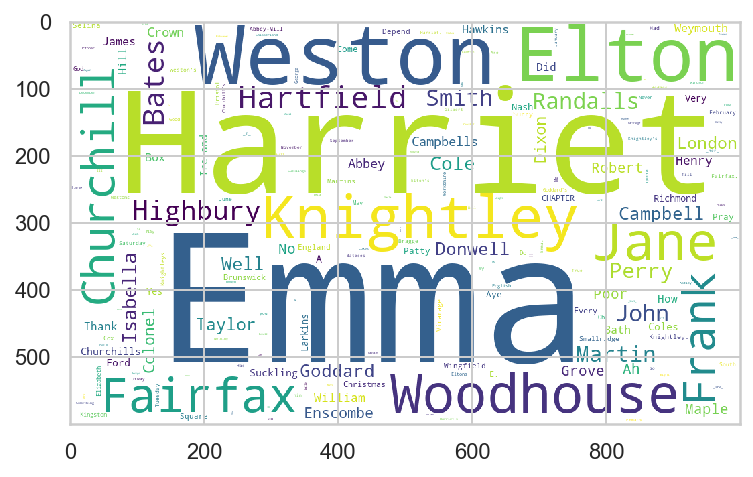

<Figure size 1440x720 with 0 Axes>

In [61]:
from wordcloud import WordCloud

wc = WordCloud(width = 1000, height=600, 
               background_color = 'white',
              random_state = 0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.figure( figsize=(20,10) )
plt.axis('off')